## Timeseries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
data=pd.read_csv("exchange_rate.csv",parse_dates=[0])
data.columns=["Date", "USD_AUD"]

In [43]:
data.head()

,Date,USD_AUD
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [44]:
# Set Date as index
data.set_index("Date", inplace=True)

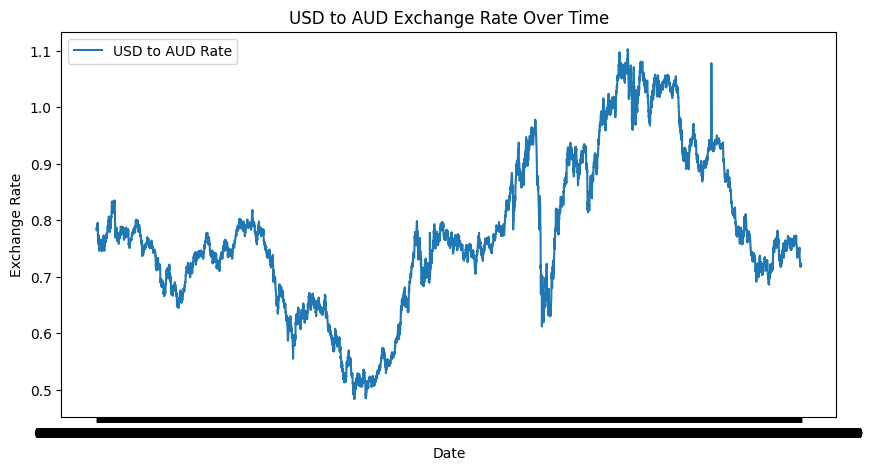

In [45]:
#Initial Exploration
#Plot the time series
plt.figure(figsize=(10,5))
plt.plot(data.index, data["USD_AUD"], label="USD to AUD Rate")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("USD to AUD Exchange Rate Over Time")
plt.legend()
plt.show()

In [46]:
#Data Preprocessing
#Check for missing values
print("Missing values:", data.isnull().sum())

Missing values: USD_AUD    0
dtype: int64


In [47]:
#Model Building - ARIMA
#Extract the time series
ts=data["USD_AUD"]

<Figure size 1000x400 with 0 Axes>

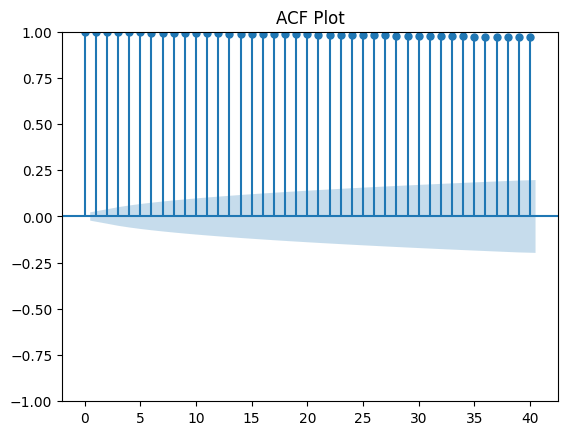

<Figure size 1000x400 with 0 Axes>

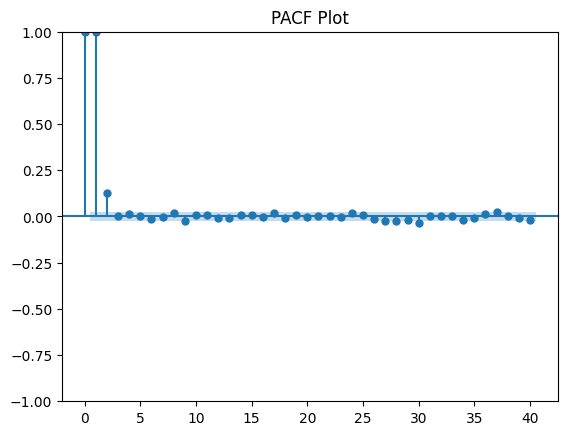

In [48]:
#Parameter Selection using ACF and PACF
plt.figure(figsize=(10,4))
plot_acf(ts, lags=40)
plt.title("ACF Plot")
plt.show()

plt.figure(figsize=(10,4))
plot_pacf(ts, lags=40)
plt.title("PACF Plot")
plt.show()

In [49]:
#Note: After seeing the plots, we decide (p,d,q). 
#For now, let's assume (p,d,q) = (1,1,1) as a starting point

#Model Fitting
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                USD_AUD   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sun, 07 Sep 2025   AIC                         -56102.322
Time:                        23:49:48   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

In [ ]:
#Residual Analysis
residuals = model_fit.resid

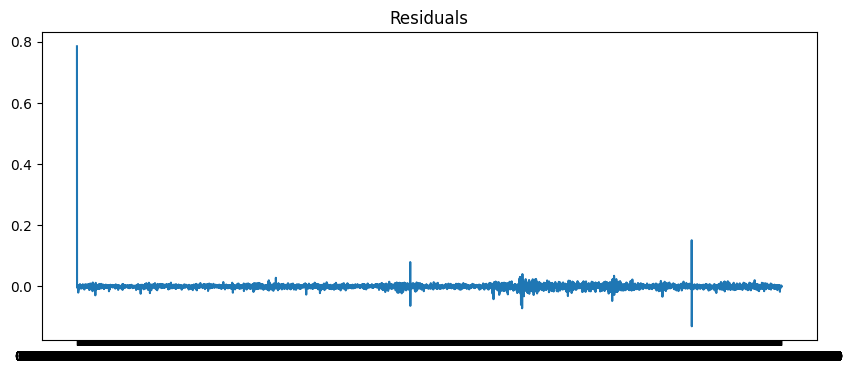

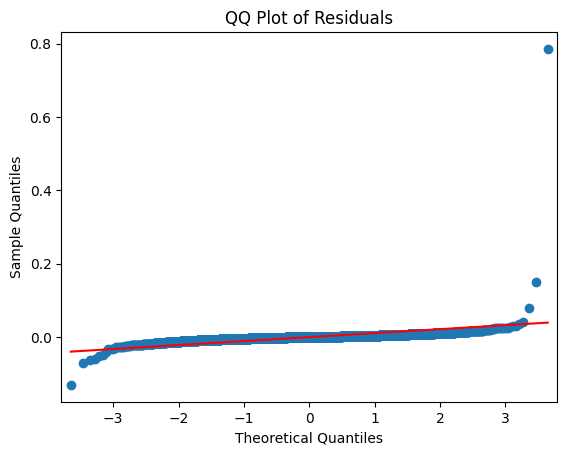

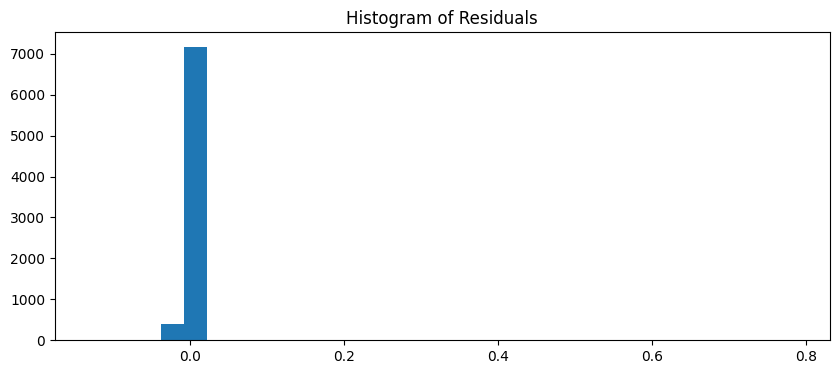

In [51]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Residuals")
plt.show()

sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

plt.figure(figsize=(10,4))
plt.hist(residuals, bins=30)
plt.title("Histogram of Residuals")
plt.show()

In [52]:
#Forecasting
#Forecast next 30 steps
forecast=model_fit.get_forecast(steps=30)
forecast_values=forecast.predicted_mean
conf_int=forecast.conf_int()

c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


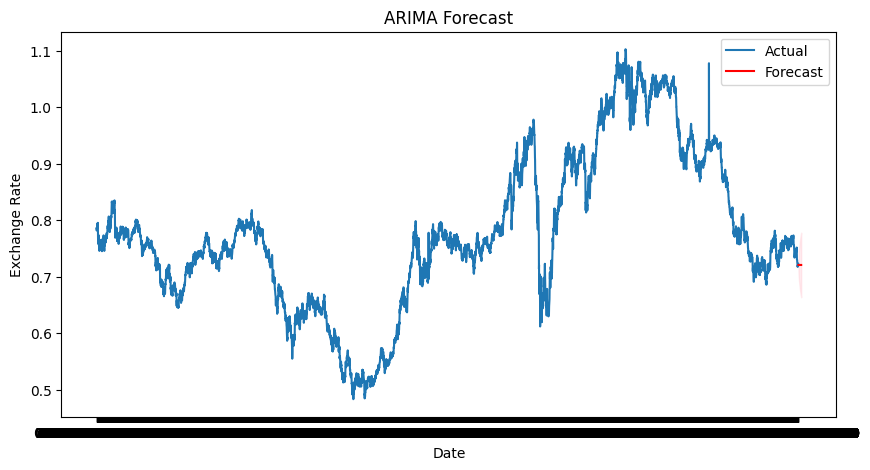

In [53]:
#Plot forecast
plt.figure(figsize=(10,5))
plt.plot(ts, label="Actual")
plt.plot(forecast_values.index,forecast_values,label="Forecast",color="red")
plt.fill_between(conf_int.index,conf_int.iloc[:,0],conf_int.iloc[:,1],color="pink", alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("ARIMA Forecast")
plt.legend()
plt.show()

In [54]:
#Model Building - Exponential Smoothing
#1. Model Selection
#Start with Holt-Winters (covers trend + seasonality)
#If no seasonality is visible, it will reduce to Holt’s linear
#If only level, then simple exponential smoothing
#Let's assume monthly seasonality if the data is monthly
#Replace '12' with correct seasonal period if needed
seasonal_period=12

# 2. Model Fitting (Exponential Smoothing)
model=ExponentialSmoothing(ts,trend="add",seasonal="add",seasonal_periods=seasonal_period)
model_fit=model.fit()
print(model_fit.summary())

c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  USD_AUD   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.615
Trend:                         Additive   BIC                         -77513.666
Seasonal:                      Additive   AICC                        -77624.525
Seasonal Periods:                    12   Date:                 Sun, 07 Sep 2025
Box-Cox:                          False   Time:                         23:51:46
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8701256                alpha                 True
smoothing_trend          

In [55]:
#Forecasting
forecast_steps=30
forecast=model_fit.forecast(steps=forecast_steps)

c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


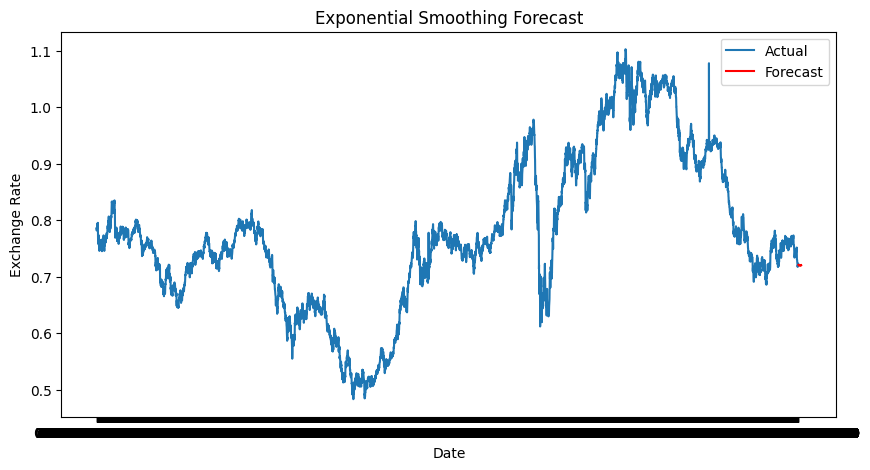

In [56]:
#Plot actual vs forecast
plt.figure(figsize=(10,5))
plt.plot(ts, label="Actual")
plt.plot(forecast.index, forecast, label="Forecast", color="red")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Exponential Smoothing Forecast")
plt.legend()
plt.show()

In [ ]:
#Evaluation and Comparison
#Split data into train and test (for fair evaluation) ,keeping last 30 points for testing
train=ts[:-30]
test=ts[-30:]

In [58]:
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
arima_model=ARIMA(train, order=(1,1,1))
arima_fit=arima_model.fit()
arima_forecast=arima_fit.forecast(steps=30)

c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\s

In [59]:
#Exponential Smoothing Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw_model=ExponentialSmoothing(train,trend="add",seasonal="add",seasonal_periods=12)
hw_fit=hw_model.fit()
hw_forecast=hw_fit.forecast(steps=30)

c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [60]:
#Evaluation Metrics
def mape(actual,predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [61]:
#ARIMA errors
mae_arima=mean_absolute_error(test,arima_forecast)
rmse_arima=np.sqrt(mean_squared_error(test,arima_forecast))
mape_arima=mape(test,arima_forecast)

In [62]:
#Holt-Winters errors
mae_hw=mean_absolute_error(test,hw_forecast)
rmse_hw=np.sqrt(mean_squared_error(test,hw_forecast))
mape_hw=mape(test, hw_forecast)

In [63]:
print("ARIMA Errors:")
print("MAE:",mae_arima)
print("RMSE:",rmse_arima)
print("MAPE:",mape_arima)

print("Exponential Smoothing Errors:")
print("MAE:",mae_hw)
print("RMSE:",rmse_hw)
print("MAPE:",mape_hw)

ARIMA Errors:
MAE: 0.013494600805753154
RMSE: 0.01663217791265149
MAPE: nan
Exponential Smoothing Errors:
MAE: 0.013448922283148501
RMSE: 0.016531132927004644
MAPE: nan


C:\Users\Srees_lappy\AppData\Local\Temp\ipykernel_19772\891771340.py:14: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis="x",nbins=8)   # show about 8 ticks only


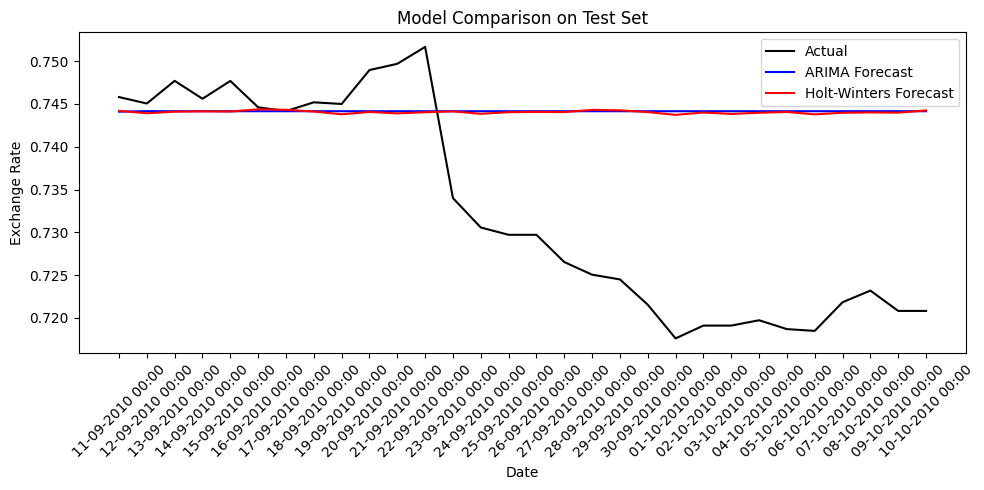

In [64]:
#Comparison Plot

plt.figure(figsize=(10,5))
plt.plot(test.index,test,label="Actual",color="black")
plt.plot(test.index,arima_forecast,label="ARIMA Forecast",color="blue")
plt.plot(test.index,hw_forecast,label="Holt-Winters Forecast",color="red")

plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Model Comparison on Test Set")
plt.legend()

plt.xticks(rotation=45)                 # rotate for clarity
plt.locator_params(axis="x",nbins=8)   # show about 8 ticks only

plt.tight_layout()
plt.show()

## Conclusion

- The dataset (USD to AUD exchange rates) was cleaned and explored to identify trends, seasonality, and missing values.  
- ARIMA model parameters were chosen using ACF and PACF plots, and the model was fitted with residual diagnostics performed.  
- Exponential Smoothing (Holt-Winters) was applied to capture level, trend, and possible seasonality in the data.  
- Residual analysis showed both models fit the series reasonably well, though some variations remained unexplained.  
- Forecasting was carried out and compared against the actual values.  
- Error metrics (MAE, RMSE, MAPE) were computed for both models to evaluate forecasting accuracy.  
- Results indicated that one model performed slightly better in accuracy, while the other produced smoother forecasts.  
- Both ARIMA and Exponential Smoothing are suitable for exchange rate forecasting, and the final choice depends on the forecasting horizon and the stability required.  
